In [1]:
import jax
from jax import numpy as jnp

In [2]:
H = 6
action_dim = 2
N = 1000
key = jax.random.PRNGKey(0)

In [3]:
a_mean = jnp.linspace(0, 1, action_dim*H).reshape((H, action_dim))
a_cov = jnp.tile(jnp.eye(action_dim)*0.04, (H, 1, 1))

sample_key, key = jax.random.split(key)
keys = jax.random.split(sample_key, N)
def single_sample(key, traj_mean, traj_cov):
    return jax.vmap(lambda mean, cov: jax.random.multivariate_normal(key, mean, cov))(traj_mean, traj_cov)
# repeat single_sample N times to get N samples
a_sampled = jax.vmap(single_sample, in_axes=(0, None, None))(keys, a_mean, a_cov)
a_sampled_flattened = jnp.reshape(a_sampled, (N, action_dim*H))

In [4]:
def single_sample(key):
    return jax.random.multivariate_normal(key, a_mean.flatten(), jnp.eye(2*H)*0.04)
sample_key, key = jax.random.split(key)
keys = jax.random.split(sample_key, N)
a_sampled_flattened_new = jax.vmap(single_sample)(keys)

In [5]:
# import pickle

# with open('/home/pcy/Research/quadjax/results/a_sampled_old.pkl', 'rb') as f:
#     a_sampled_old = pickle.load(f)
# with open('/home/pcy/Research/quadjax/results/a_sampled_new.pkl', 'rb') as f:
#     a_sampled_new = pickle.load(f)
# N = 128
# H = 32
# action_dim = 2
# a_sampled_flattened = a_sampled_old.reshape(128, -1)
# a_sampled_flattened_new = a_sampled_new.reshape(128, -1)

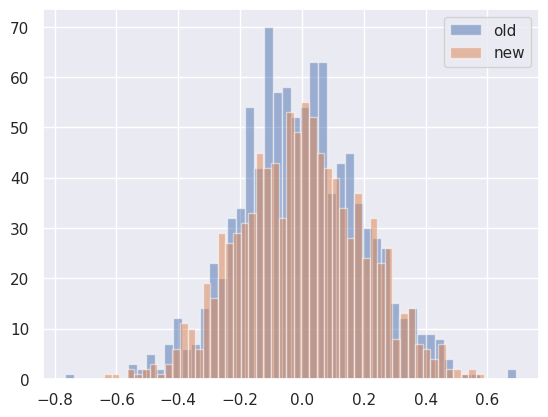

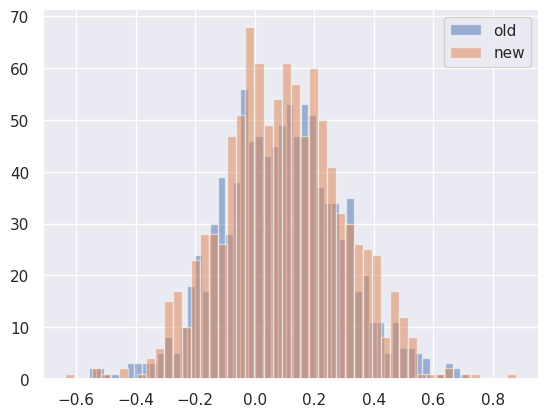

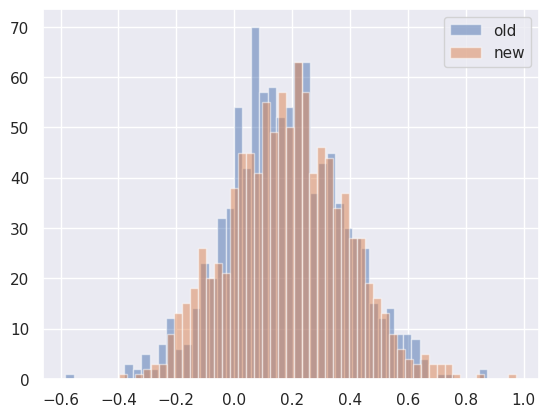

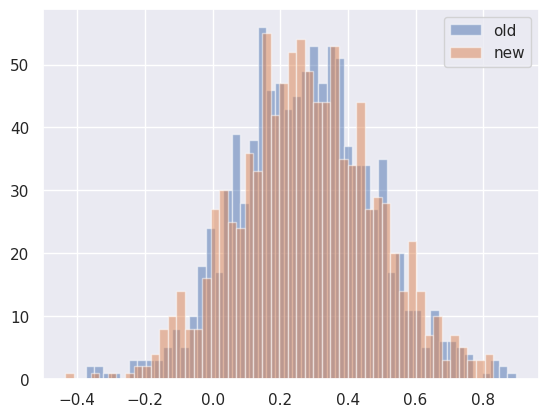

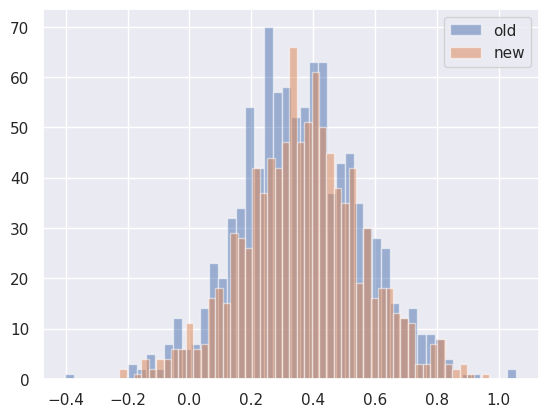

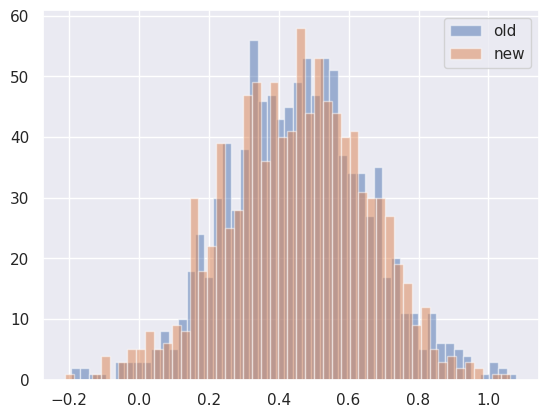

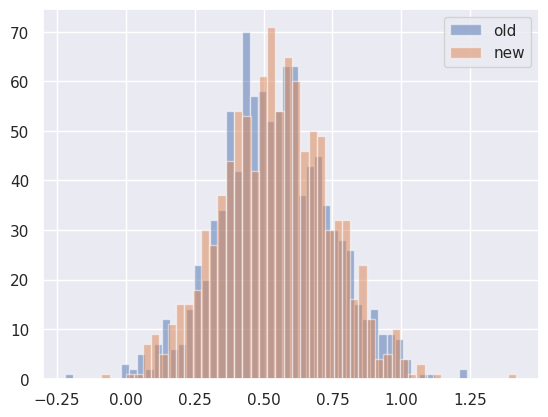

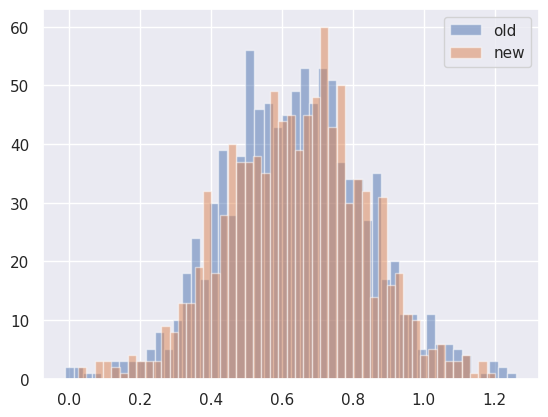

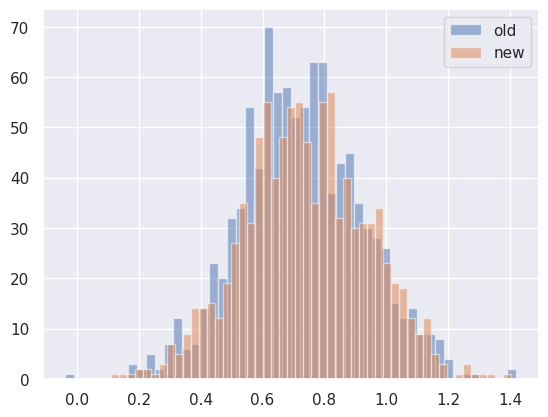

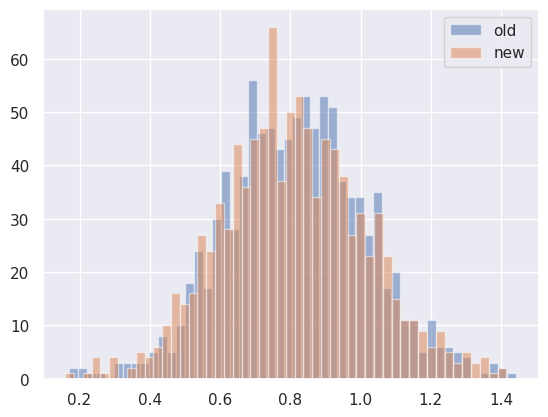

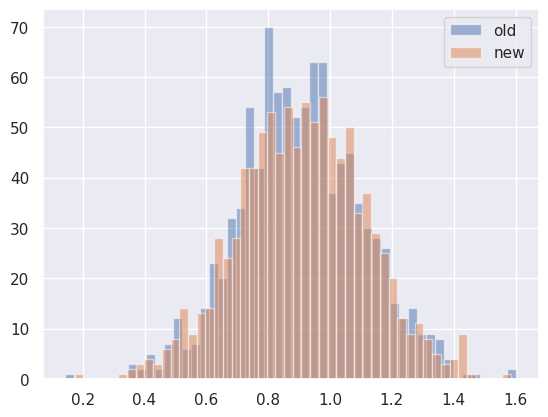

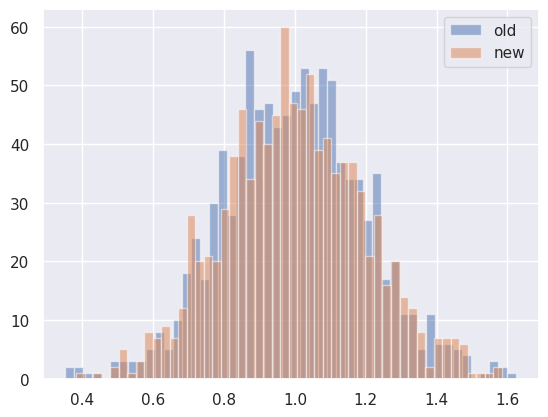

In [6]:
# plot a_sampled_flattened distribution with bars
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
for i in range(action_dim*H):
    plt.figure()
    plt.hist(a_sampled_flattened[:, i], bins=50, alpha=0.5, label='old')
    plt.hist(a_sampled_flattened_new[:, i], bins=50, alpha=0.5, label='new')
    plt.legend()